# 아이리스 데이터셋 만들기

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import sklearn.datasets as sd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [14]:
iris = sd.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
df_train = pd.read_csv('../static/data/iris_train.csv')
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.3,1.7,0.5,0
1,6.1,3.0,4.9,1.8,2
2,5.1,3.4,1.5,0.2,0
3,5.1,3.5,1.4,0.3,0
4,5.2,3.4,1.4,0.2,0


In [34]:
y_train = df_train.target.values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_train.drop(columns='target', axis=1))
X_train.shape, y_train.shape

((112, 4), (112,))

In [37]:
df_test = pd.read_csv('../static/data/iris_test.csv')
y_test = df_test.target.values
X_test = scaler.fit_transform(df_test.drop(columns='target', axis=1))
X_test.shape, y_test.shape

((38, 4), (38,))

### 산점도와 회귀곡선

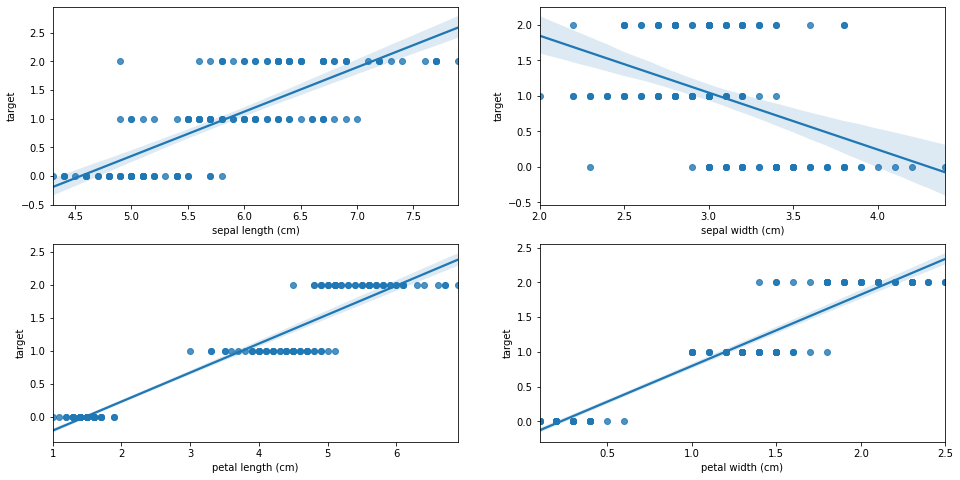

In [56]:
fig, asx = plt.subplots(figsize=(16,8), ncols=2, nrows=2)
iris_features = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
for i, feature in enumerate(iris_features):
    row, col = int(i/2), i%2
    sns.regplot(x=feature, y='target', data=df, ax=asx[row][col])

### scikit-learn 회귀모델

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}')
print(f'R_squared: {r2:.4f}')

MSE: 0.08, RMSE: 0.27
R_squared: 0.8853


In [59]:
lr.coef_

array([-0.40076172, -0.03912493,  1.22131156,  1.53651103])

In [60]:
lr.intercept_

-0.07812310790623056

### 교차검증

In [61]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

In [63]:
# 5 폴드 세트로 MSE를 구함
neg_mean_scores = cross_val_score(lr, iris.data, iris.target,
                                 scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_mean_scores)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_mean_scores,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-0.01 -0.03 -0.12 -0.05 -0.13]
개별 RMSE: [0.11 0.18 0.34 0.23 0.36]
평균 RMSE: 0.2444
